In [1]:
import pandas as pd
import numpy as np
import json

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import linear_rainbow, het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import LabelEncoder

%load_ext autoreload
%autoreload 2

import os
import sys
module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
df = pd.read_json('../Data/combined_with_dummies.json')

In [3]:
from src.mymods import correlation_info

The top correlation features for you target it: ['SqFtTotLiving', 'wtrloc_6.0', 'lakewas_4.0', 'tideshore_2.0', 'SqFtOpenPorch', 'wtrbank_1.0']


(None, <matplotlib.axes._subplots.AxesSubplot at 0x7fb57ce34eb0>)

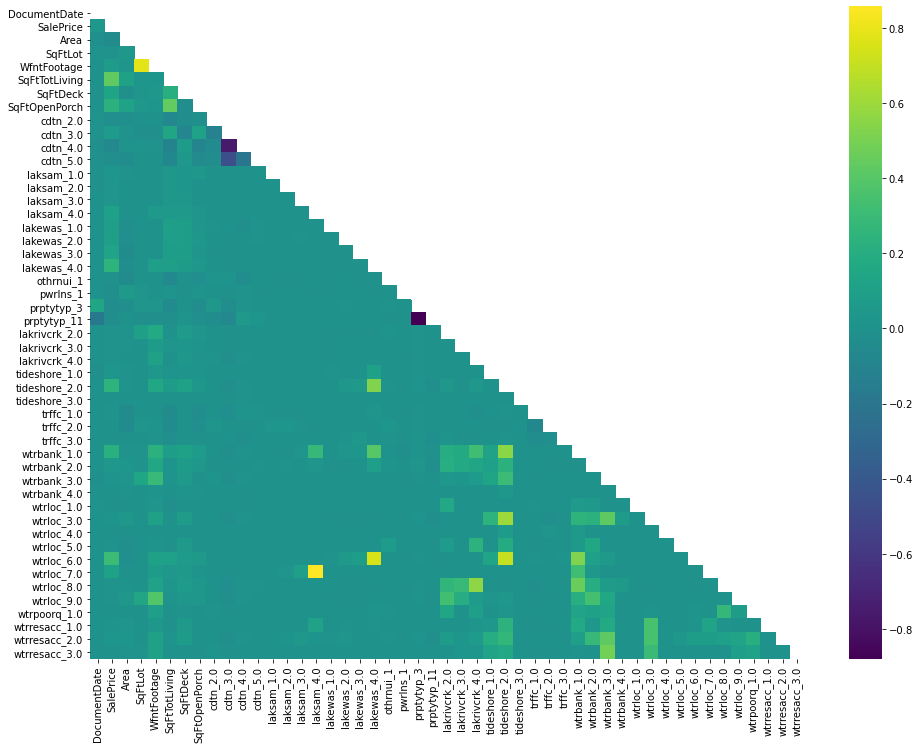

In [4]:
correlation_info(df, 'SalePrice', .2)

In [4]:
from src.mymods import model_summary

In [5]:
model_summary(df, 'SalePrice',['SqFtTotLiving', 'wtrloc_6.0', 'lakewas_4.0', 'tideshore_2.0', 'SqFtOpenPorch', 'wtrbank_1.0', 'SqFtDeck', 'lakewas_3.0', 'wtrloc_7.0', 'laksam_4.0'])

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.631
Model:                            OLS   Adj. R-squared (uncentered):              0.630
Method:                 Least Squares   F-statistic:                              4600.
Date:                Wed, 30 Sep 2020   Prob (F-statistic):                        0.00
Time:                        14:13:22   Log-Likelihood:                     -4.0128e+05
No. Observations:               26955   AIC:                                  8.026e+05
Df Residuals:                   26945   BIC:                                  8.027e+05
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
SqFtTotLiving   340.3313      2.741    124.178      0.000     334.959     345.703
wtrloc_6.0     2.552e+06   1.22e+05     20.910      0.000    2.31e+06    2.79e+06
lakewas_4.0    2.235e+05   9.59e+04      2.331      0.020    3.56e+04    4.11e+05
tideshore_2.0   4.05e+05   7.32e+04      5.533      0.000    2.62e+05    5.49e+05
SqFtOpenPorch   298.2697     37.420      7.971      0.000     224.925     371.614
wtrbank_1.0    1.561e+05   5.41e+04      2.888      0.004    5.02e+04    2.62e+05
SqFtDeck        107.7639     21.096      5.108      0.000      66.414     149.113
lakewas_3.0    8.462e+05    5.8e+04     14.593      0.000    7.33e+05     9.6e+05
wtrloc_7.0       1.3e+06   2.23e+05      5.840      0.000    8.64e+05    1.74e+06
laksam_4.0     4.488e+05   2.08e+05      2.161      0.031    4.18e+04    8.56e+05
==============================================================================
Omnibus:                    50582.316   Durbin-Watson:                   1.488
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        138879995.375
Skew:                          14.170   Prob(JB):                         0.00
Kurtosis:                     353.502   Cond. No.                     1.62e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.62e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Colinearity

In [ ]:
fsm_resids = fsm.resid

# Normality

In [7]:
test_model = sm.OLS(df['SalePrice'], df[['SqFtTotLiving', 'wtrloc_6.0', 'lakewas_4.0', 'tideshore_2.0', 'SqFtOpenPorch', 'wtrbank_1.0', 'SqFtDeck', 'lakewas_3.0', 'wtrloc_7.0', 'laksam_4.0']]).fit()

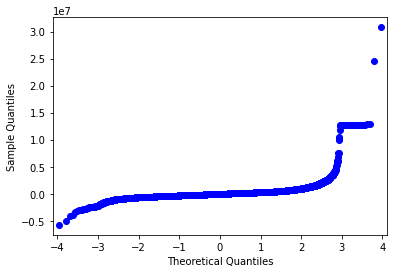

In [9]:
test_model_resids = test_model.resid

sm.qqplot(test_model_resids);

In [ ]:
'''
The JB score has a low p-value means that the current model violates the
normality assumption. 
That supports the qq visual with the crooked tail.
'''

# Homoscadasticity

In [19]:
df.SalePrice.mean()

814041.8808755333

In [11]:
y_hat = test_model.predict()

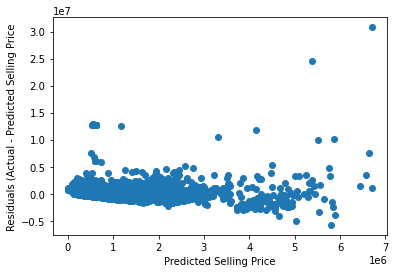

In [13]:
fig, ax = plt.subplots()
ax.set(xlabel="Predicted Selling Price",
        ylabel="Residuals (Actual - Predicted Selling Price")
ax.scatter(y_hat, test_model_resids);